# Sentiment analysis on Amazon reviews

We are given Amazon reviews from several customers. That is our data. We have to do a sentiment Analysis on those data. Basically the goal of<br> this project is to do a sentiment analysis using ```Natural Language Processing (NLP)``` on the Amazone review data.

To know more about NLP, please refer the following documents:
- [Natural Language processing](https://en.wikipedia.org/wiki/Natural_language_processing)
- [NLP explained](https://www.ibm.com/topics/natural-language-processing)
- [NLP steps to follow](https://www.techtarget.com/searchenterpriseai/definition/natural-language-processing-NLP)

In this notebook, we will be :
- doing an Exploratory Data Analysis (EDA) on Amazone review data
- plotting a word cloud and list top 3 popular words
- training multiple models using Scikit learn
- Evaluate model performance

## Import data and Perform EDA

Let's start my importing the important libraries!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


Lets load the dataset:

In [3]:
# Load the data
reviews_df = pd.read_csv('./data/amazon_reviews.csv')
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


Check the shape of the dataframe:

In [4]:
reviews_df.shape

(3150, 5)

So we see that:
- there are 3150 rows and 5 columns

Checking more information on the data:

In [5]:
# View the DataFrame Information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


We see that:
- no null values present on the data

Check the statistics:

In [6]:
# View DataFrame Statistical Summary
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


Let's see some plots and try to understand the data better:

<AxesSubplot: xlabel='rating', ylabel='count'>

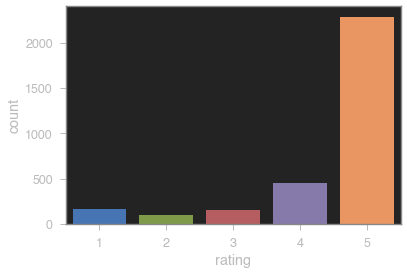

In [7]:
# Plot the count plot for the ratings
sns.countplot(x = reviews_df['rating']) 

We see that the 
- rating of the product is from 1-5
- most of the ratings are 5 and very small numbers rated 1.

Let's get the length of the reviews and add it as a new column to the existing dataset:

In [9]:
# Let's get the length of the verified_reviews column
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


Plot the distribution of the length:

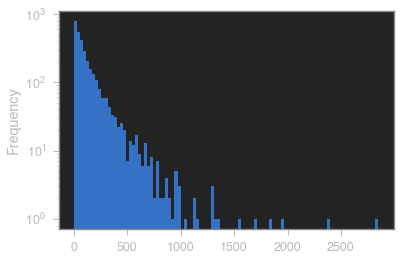

In [11]:
# Plot the histogram for the length
reviews_df['length'].plot(bins=100, kind='hist') 
plt.yscale('log')

Above distribution shows that, most of the reviews are short, with a length of around 100. 

In [12]:
# Apply the describe method to get statistical summary
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


We see that:
- the minimum length among the review is of 1
- the maximum length of the review is 2851
- Most of the reviews has a length of 132

Let's draw a countpot to see the number of positive and negative reviews:

<AxesSubplot: xlabel='feedback', ylabel='count'>

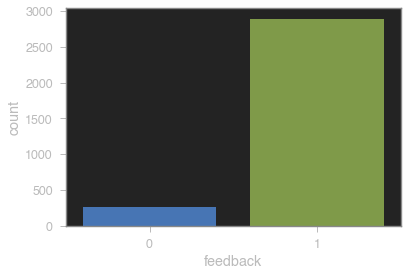

In [13]:
# Plot the countplot for feedback
# Positive ~2800
# Negative ~250
sns.countplot(x = reviews_df['feedback'])

It clearly shows that the reviews are more positive

## Plotting word cloud

```Wordcloud``` is a visual representation of text data which is often used to depict keyword metadata on websites, or to visualize free<br>
form text. Tags are usually single words, and the importance of each tag is shown with font size or color.

This is an interesting concept! To know more about it, see [here](https://medium.com/@harinisureshla/wordclouds-basics-of-nlp-5b60be226414).

Let's visualize the wordcloud of the positive ```(tweets with label 1)``` and negitive ```(tweets with label 0)``` tweets separately:

In [14]:
# Obtain only the positive reviews
positive = reviews_df[reviews_df['feedback'] == 1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [15]:
# Obtain the negative reviews only
negative = reviews_df[reviews_df['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


Starting with the word cloud for positive reviews:

In [16]:
# Convert to list format
sentences = positive['verified_reviews'].tolist()
len(sentences)

2893

Let's join all the positive tweets into a sentence by converting into a list and then draw a wordcloud!

In [17]:
# Join all reviews into one large string
sentences_as_one_string =" ".join(sentences)

In [ ]:
sentences_as_one_string

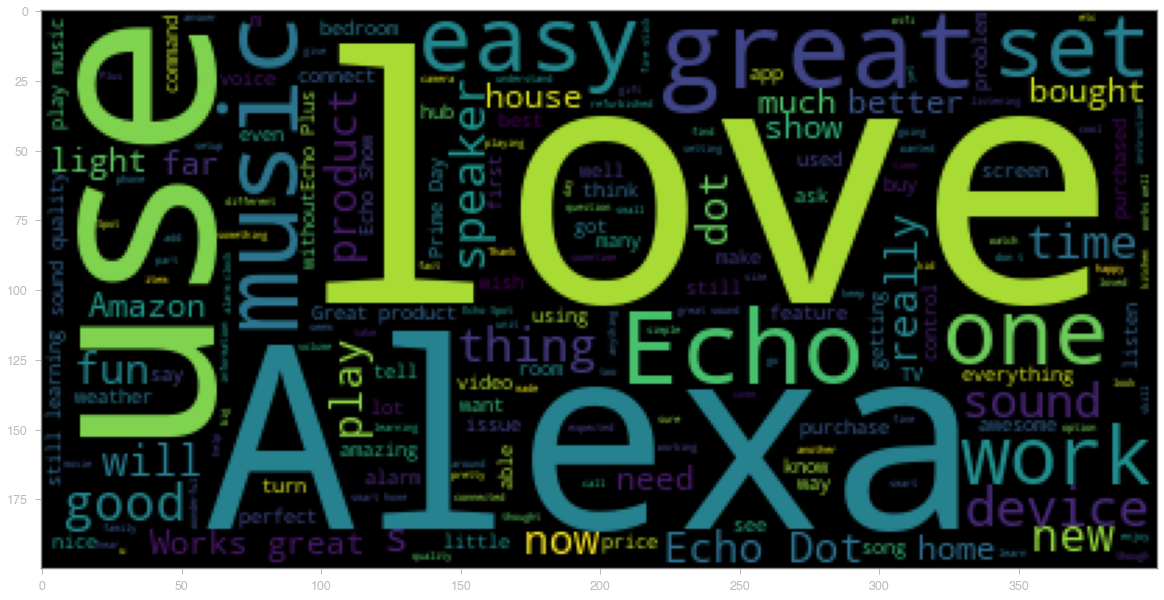

In [19]:
from wordcloud import WordCloud #import the package

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

Such a lovely word cloud right??

Do the similar steps with negative reviews:

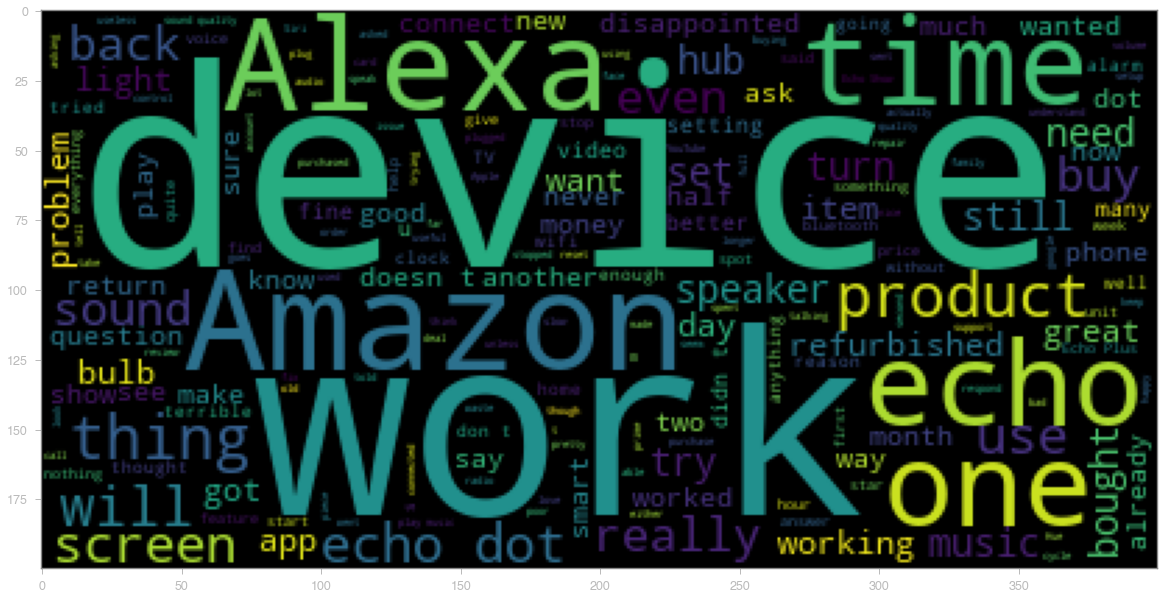

In [20]:
sentences = negative['verified_reviews'].tolist()
len(sentences)
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

## Data cleaning

Let's start cleaning the data!

Let's start cleaning the data! There are several step involved in cleaning a text data. Let's discuss one by one.

Now we are going to implement a function which

- remove punctuation
- remove stop words
- performs count vectorization (Tockenization)

```Punctuation```, ```Stop words``` and ```Tockenization``` are the 3 important steps that has to be followed in NLP data cleaning!

We can start by importing useful packages for this pourpose:

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

So ```Punctuations``` are certain conventional marks or characters in writing or printing in order to separate elements and make the meaning clear.

To know more on Punctuation, see [here](https://studymachinelearning.com/text-preprocessing-removal-of-punctuations/).

What are ```stop words```??

In [22]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haritharetnakaran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Above we can see stop words! So they are a set of commonly used words in any language. In NLP, stop words are used to eliminate unimportant words,<br>
allowing applications to focus on the important words instead. To get a bit more idea, read [here](https://kavita-ganesan.com/what-are-stop-words/#:~:text=Stop%20words%20are%20a%20set,While%E2%80%A6).

Last but not least, what is ```Vectorization```?

So it is the process of of converting words into numbers are called Vectorization! It is a methodology in NLP to map words or phrases from<br>
vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics. To know the idea of<br>
vectorization in detail, please read this [document](https://neptune.ai/blog/vectorization-techniques-in-nlp-guide).

In [23]:
from sklearn.feature_extraction.text import CountVectorizer # import count vectorizer module

Our idea here is to build a pipeline which does the above 3 techniques and clean our data, so that its easy to call it whenever we needed to<br>
perform those actions.

In [25]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

Let's check the above function on our Amazon review dataset!

In [26]:
# Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [27]:
# show the original review
print(reviews_df['verified_reviews'][5]) 

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [28]:
# show the cleaned up version
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


From the above two versions, we can see how the cleaning has done its magic!

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [ ]:
print(vectorizer.get_feature_names())

This is how the vectorizer looks like!

Lets convert our text data into a vectorized output for further analysis:

In [31]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


What we see above is the vectorized version of our data!

Check the shape:

In [32]:
reviews_countvectorizer.shape

(3150, 5211)

So we still have 3150 inputs!! But 5211 columns!

Now comes the magic! Let's convert our vectorized array to a dataframe! So that it looks similar to our initial dataframe, but with different<br> inputs!

In [37]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
X = reviews
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Now we can see the whole dataset with all the feature! This is the dataset that we are using from here onwards to train!

Where is out label now? Let's just grab it from the first data frame

In [35]:
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

## Train and evaluate a Naive Bayes classifier model

In statistics, ```Naive Bayes classifiers``` are a family of simple "probabilistic classifiers" based on applying ```Bayes' theorem``` with strong<br>
(naive) independence assumptions between the features (see Bayes classifier). They are among the simplest Bayesian network models.

To know more about the theory behind this model, read the following documents:

- [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
- [Bayes' Theorem](https://www.investopedia.com/terms/b/bayes-theorem.asp)

Now we follow the same procedure that we do with a numerical data.

- Split the data in to train and test!
- do the training
- evaluate the results

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

For the evaluation of the model, we have to use an evaluation matrix.

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot: >

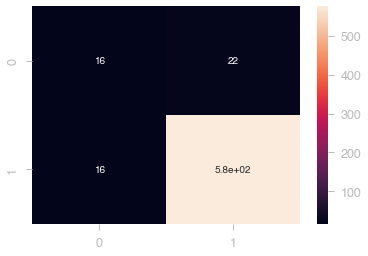

In [41]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

Above confusion matrix shows the true positives, true negatives, false positives and false negitives from our prediction using the model on our<br>
test data!

Let's see the classification report:

In [42]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.50      0.42      0.46        38
           1       0.96      0.97      0.97       592

    accuracy                           0.94       630
   macro avg       0.73      0.70      0.71       630
weighted avg       0.94      0.94      0.94       630



What you see above are:

- the precision of the model prediction on each class: positive and negitive and we see that the model prediction did well on the positive class <br> with a precision of 0.96, recall of 0.97 and an f1-score of 0.97. This is great!

- below that we see the weighted average of the prediction in total and it gives us a value of 0.94, which is a great model!

Let's try another model: ```Logistic Regression```

To know more aboiut this model, see [here](https://en.wikipedia.org/wiki/Logistic_regression):

              precision    recall  f1-score   support

           0       0.80      0.32      0.45        38
           1       0.96      0.99      0.98       592

    accuracy                           0.95       630
   macro avg       0.88      0.66      0.71       630
weighted avg       0.95      0.95      0.94       630



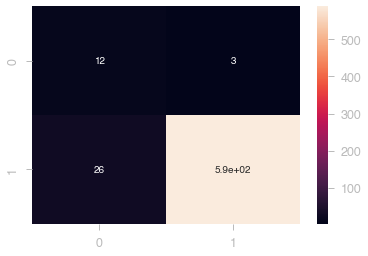

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

We can see that the prediction of this regression model didn't do well compared to the Naive Bayes model. It can be because of the fact that:
- the problem here is a classification problem. but the model is a regressor, which can do bad on the data.

Lets try another model: ```Gradient Boosting Classifier```

To know more about this model, read [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

              precision    recall  f1-score   support

           0       0.71      0.13      0.22        38
           1       0.95      1.00      0.97       592

    accuracy                           0.94       630
   macro avg       0.83      0.56      0.60       630
weighted avg       0.93      0.94      0.93       630



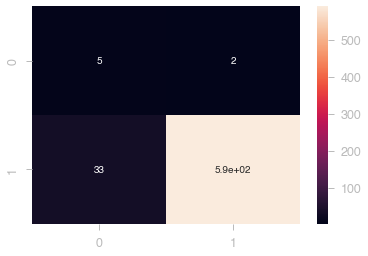

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

We can see that the prediction of this regression model didn't do well compared to the Naive Bayes model. We have to check further to analyse these.